## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
stroke = pd.read_csv("stroke_data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


## Descriptive stats

In [3]:
stroke.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


## Inspect data

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null object
heart_disease        5110 non-null object
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 479.1+ KB


In [5]:
stroke.shape

(5110, 12)

## Correlation before filling bmi missing values

In [6]:
corr = stroke.corr()
corr

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.003084
age,0.003538,1.000000,0.238171,0.333398
avg_glucose_level,0.001092,0.238171,1.000000,0.175502
bmi,0.003084,0.333398,0.175502,1.000000


Text(0.5, 1, 'Correlation Heatmap')

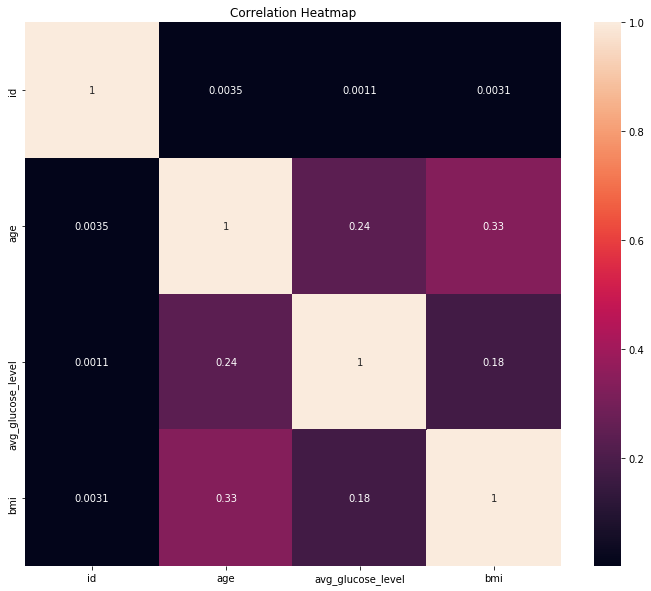

In [7]:
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True)
plt.title('Correlation Heatmap')

## Fill missing bmi values

In [8]:
print(stroke['bmi'].median())
print(stroke['bmi'].mean())

28.1
28.893236911794673


In [9]:
#replacing missing values in bmi with the median or mean (they are very similar)
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].median())
stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
6,53882,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
7,10434,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,Yes
8,27419,Female,59.0,No,No,Yes,Private,Rural,76.15,28.1,Unknown,Yes
9,60491,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,Unknown,Yes


## Correlation after filling bmi missing values

In [10]:
corr = stroke.corr()
corr

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.005555
age,0.003538,1.000000,0.238171,0.324296
avg_glucose_level,0.001092,0.238171,1.000000,0.166876
bmi,0.005555,0.324296,0.166876,1.000000


Text(0.5, 1, 'Correlation Heatmap')

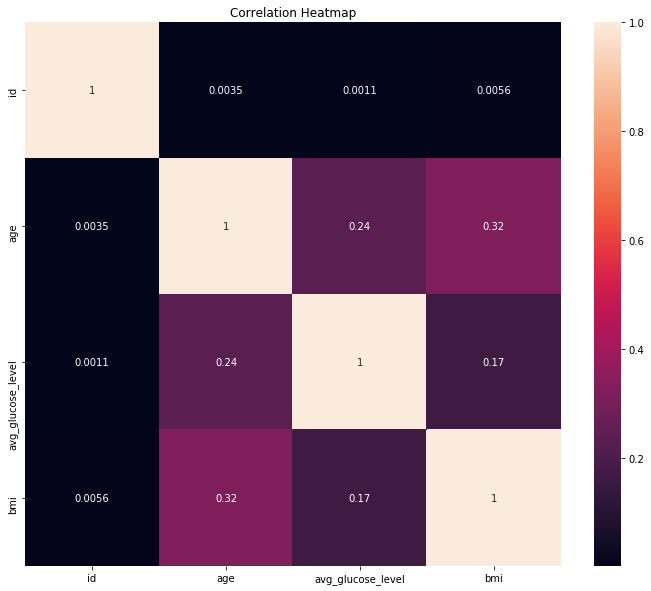

In [11]:
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True)
plt.title('Correlation Heatmap')

## Number of strokes per age group

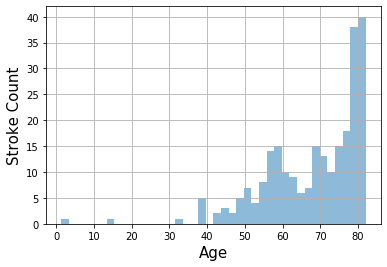

In [12]:
had_stroke = stroke[(stroke.stroke == 'Yes')]
had_stroke['age'].hist(density=0, histtype='stepfilled', alpha=.5, bins=40)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Stroke Count',fontsize=15)
plt.show()

## Cleaning and pre-processing

In [13]:
#checking unique values in columns of type 'object'
print(f"gender: {stroke['gender'].unique()}\n")
print(f"hypertension: {stroke['hypertension'].unique()}\n")
print(f"heart_disease: {stroke['heart_disease'].unique()}\n")
print(f"ever_married: {stroke['ever_married'].unique()}\n")
print(f"work_type: {stroke['work_type'].unique()}\n")
print(f"Residence_type: {stroke['Residence_type'].unique()}\n")
print(f"smoking_status: {stroke['smoking_status'].unique()}\n")
print(f"stroke: {stroke['stroke'].unique()}\n")

gender: ['Male' 'Female' 'Other']

hypertension: ['No' 'Yes']

heart_disease: ['Yes' 'No']

ever_married: ['Yes' 'No']

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type: ['Urban' 'Rural']

smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke: ['Yes' 'No']



## Converting text to binary

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

stroke['hypertension'] = label_encoder.fit_transform(stroke['hypertension'])
stroke['heart_disease'] = label_encoder.fit_transform(stroke['heart_disease'])
stroke['ever_married'] = label_encoder.fit_transform(stroke['ever_married'])
stroke['stroke'] = label_encoder.fit_transform(stroke['stroke'])
stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,0,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,1,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,1,Private,Urban,58.57,24.2,Unknown,1


## Converting text to catagories

In [15]:
gender_values = list(stroke['gender'].unique())
gender_mappings = {label: index for index, label in enumerate(gender_values)}
gender_mappings

{'Male': 0, 'Female': 1, 'Other': 2}

In [16]:
WorkType_values = list(stroke['work_type'].unique())
WorkType_mappings = {label: index for index, label in enumerate(WorkType_values)}
WorkType_mappings

{'Private': 0,
 'Self-employed': 1,
 'Govt_job': 2,
 'children': 3,
 'Never_worked': 4}

In [17]:
ResidenceType_values = list(stroke['Residence_type'].unique())
ResidenceType_mappings = {label: index for index, label in enumerate(ResidenceType_values)}
ResidenceType_mappings

{'Urban': 0, 'Rural': 1}

In [18]:
SmokingStatus_values = list(stroke['smoking_status'].unique())
SmokingStatus_mappings = {label: index for index, label in enumerate(SmokingStatus_values)}
SmokingStatus_mappings

{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

In [19]:
stroke['gender'] = stroke['gender'].apply(lambda x: gender_mappings[x])
stroke['work_type'] = stroke['work_type'].apply(lambda x: WorkType_mappings[x])
stroke['Residence_type'] = stroke['Residence_type'].apply(lambda x: ResidenceType_mappings[x])
stroke['smoking_status'] = stroke['smoking_status'].apply(lambda x: SmokingStatus_mappings[x])
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,1,1,1,202.21,28.1,1,1
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,1,1,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,0,0,186.21,29.0,0,1
6,53882,0,74.0,1,1,1,0,1,70.09,27.4,1,1
7,10434,1,69.0,0,0,0,0,0,94.39,22.8,1,1
8,27419,1,59.0,0,0,1,0,1,76.15,28.1,3,1
9,60491,1,78.0,0,0,1,0,0,58.57,24.2,3,1


## Check if all object have been converted

In [20]:
#checking if there're any column with of type 'object'
np.sum(stroke.dtypes == 'object')

0

## Drop irrelevant columns

In [21]:
stroke.drop(['id'], axis=1, inplace=True)
stroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,0,1
1,1,61.0,0,0,1,1,1,202.21,28.1,1,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1
4,1,79.0,1,0,1,1,1,174.12,24.0,1,1
5,0,81.0,0,0,1,0,0,186.21,29.0,0,1
6,0,74.0,1,1,1,0,1,70.09,27.4,1,1
7,1,69.0,0,0,0,0,0,94.39,22.8,1,1
8,1,59.0,0,0,1,0,1,76.15,28.1,3,1
9,1,78.0,0,0,1,0,0,58.57,24.2,3,1


## Check for outliers

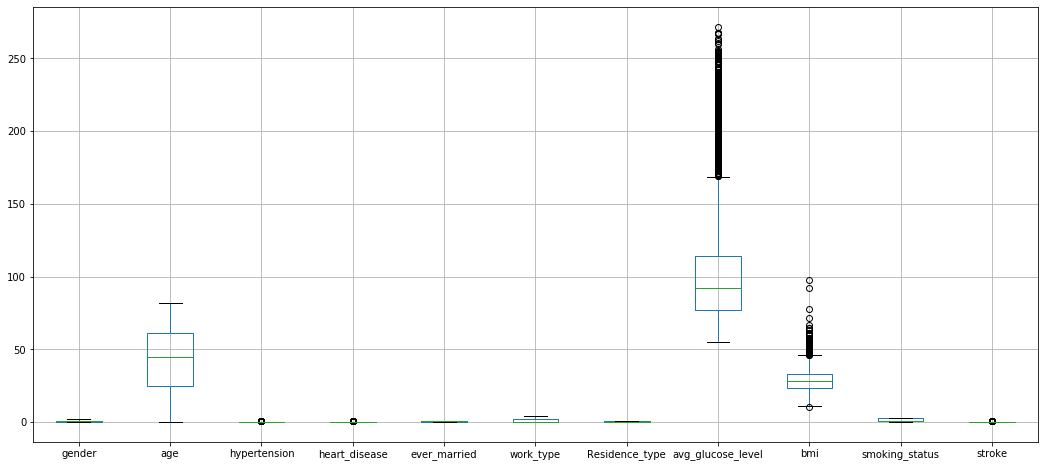

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
stroke.boxplot(figsize = (18, 8))

## Remove outliers

In [23]:
Q1 = stroke.quantile(0.25)
Q3 = stroke.quantile(0.75)
IQR = stroke.std()

stroke_clean = stroke[~((stroke < (Q1 - 2.5 * IQR)) |
                            (stroke > (Q3 + 2.5 * IQR))).any(axis=1)]

print("Initial dimensions:                  ", stroke.shape)
print("Dimensions after removing outliers: ", stroke_clean.shape)

Initial dimensions:                   (5110, 11)
Dimensions after removing outliers:  (4126, 11)


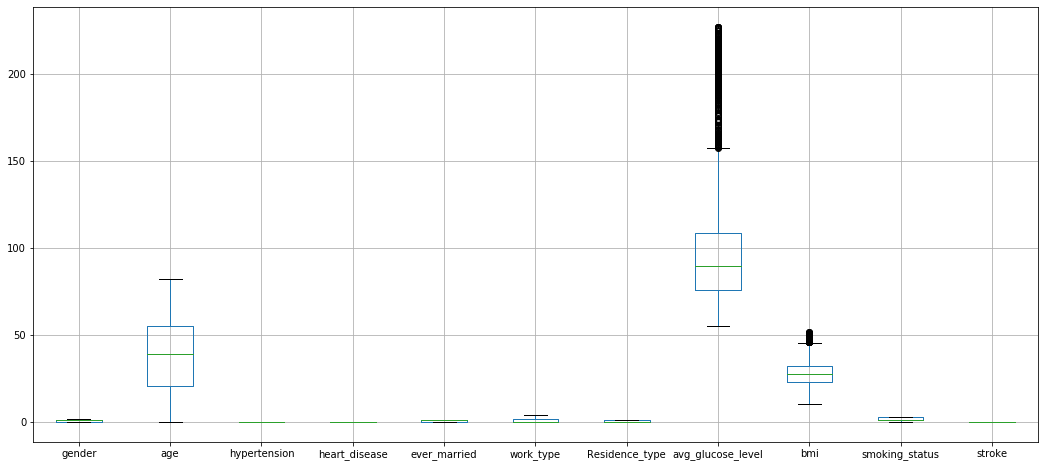

In [24]:
stroke_clean.boxplot(figsize = (18, 8))

## Write cleaned and pre-processed data to CSV file

In [25]:
stroke_clean.to_csv('clean_stroke_data.csv', index=False, encoding='utf-8')